In [27]:
import cv2
import numpy as np
import os
from seg_visual_tools import *

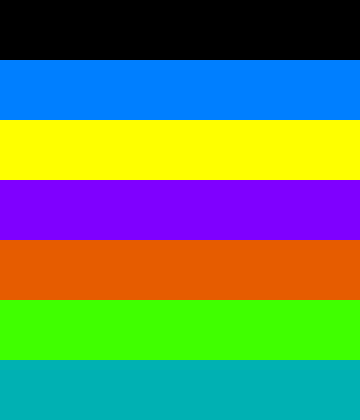

In [28]:
stride = 60
classes = 6
color_map = np.zeros((stride,stride*classes), dtype=np.uint8)
color_map.fill(0)
for i in range(classes):
    color_layer = np.zeros((stride,stride*classes), dtype=np.uint8)
    color_layer.fill(i+1)
    color_map = np.concatenate((color_map, color_layer), axis=0)

background = cv2.cvtColor(np.zeros(color_map.shape, dtype=np.uint8), cv2.COLOR_GRAY2BGR)

image = blend_with_filled_mask(image=background, required_classes=[1,2,3,4,5,6], num_class=7, mask=color_map, mask_weight=1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
Image.fromarray(image.astype(np.uint8))

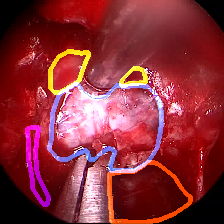

In [37]:
# OUT_DIR = './label_check'
sample_image = "./data_224/train/imgs/case_0101-Vid_20200722083924-frame_13225.png"
sample_mask = "./data_224/train/labels/case_0101-Vid_20200722083924-frame_13225.png"
# sample_center = "Dataset110_SellaSegment/labelsTs_center_points.json"

# extract data from files
if not os.path.exists(OUT_DIR):
    os.makedirs(OUT_DIR)
case_name = sample_image.split('/')[-1].split('.')[0]
arr_source = load_array_from_png(sample_image, mode='image')
arr_mask = load_array_from_png(sample_mask, mode='mask')
# key_points = load_points_from_json(sample_center, case_name, kept_class=[1, 2, 3, 4, 5, 6])

image = blend_with_contour_mask(image=arr_source, required_classes=[1, 2, 3, 4, 5, 6], num_class=7, mask=arr_mask,
                                blend_weight=0.8)
# image = blend_with_filled_mask(image=arr_source, required_classes=[1,2,3,4,5,6], num_class=7, mask=arr_mask, img_weight=0.96, mask_weight=0.7)
# image = blend_with_star_points(image=image, points=key_points, points_classes=[1,2,3,4,5,6], blend_weight=1, size=20)
# image = blend_with_circle_points(image=image, points=key_points, points_classes=[1, 2, 3, 4, 5, 6], thickness=-1,
#                                  blend_weight=0.3, size=image.shape[0] * 0.2)
# image = blend_with_circle_points(image=image, points=key_points, points_classes=[1, 2, 3, 4, 5, 6], thickness=3,
#                                  blend_weight=1, size=10)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
Image.fromarray(image.astype(np.uint8))

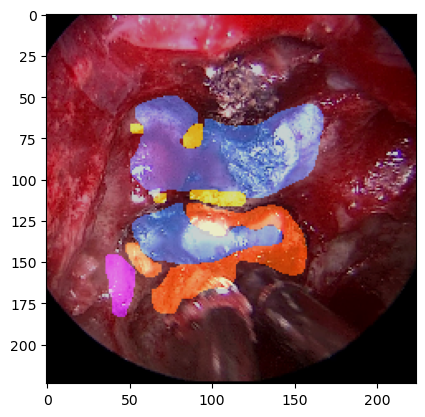

In [25]:
import os
from matplotlib import pyplot as plt

SPLIT= "test"
LABEL = "PR" # GT or PR
MODEL = "unet_pp" # None unet_pp swin_unet swin_GCN
IMAGE_SIZE = "224"
BKG = 'img' # img or black

image_dir = f"./data_224/{SPLIT}/imgs"
# mask_dir = f"./data_224/{SPLIT}/labels"
mask_dir = f"./plot_PR/preds/PR_unetpp_epoch50"

blend_out_dir = f'./plot_PR/plot_{LABEL}_{SPLIT}_{MODEL}_{IMAGE_SIZE}_{BKG}'


if not os.path.exists(blend_out_dir):
    os.makedirs(blend_out_dir)

images = os.listdir(image_dir)
masks = os.listdir(mask_dir)

show_sample = True

for image,mask in zip(images, masks):
    arr_source = load_array_from_png(os.path.join(image_dir, image), mode='image')
    arr_mask = load_array_from_png(os.path.join(mask_dir, mask), mode='mask')
    if arr_source is None or arr_mask is None:
        raise Exception("got none of the images")
    
    # img = blend_with_contour_mask(image=arr_source, required_classes=[1, 2, 3, 4, 5, 6], num_class=7, mask=arr_mask,
    #                                 blend_weight=0.8, thickness=2)
    if BKG == "img":
        # img = blend_with_contour_mask(image=arr_source, required_classes=[1, 2, 3, 4, 5, 6], num_class=7, mask=arr_mask,
        #                             blend_weight=0.8, thickness=2)
        img = blend_with_filled_mask(image=arr_source,
                                     required_classes=[1,2,3,4,5,6], num_class=7,
                                     mask=arr_mask, img_weight=0.96, mask_weight=0.7)
    else:
        img = blend_with_filled_mask(image=np.zeros_like(arr_source),
                                     required_classes=[1,2,3,4,5,6], num_class=7,
                                     mask=arr_mask, img_weight=0.96, mask_weight=0.7)
    # img = blend_with_filled_mask(image=img, required_classes=[1,2,3,4,5,6], num_class=7, mask=arr_pred, blend_weight=0.4)
    cv2.imwrite(filename=os.path.join(blend_out_dir, str(image)), img=img)
    
    if show_sample:
        plt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt_img = Image.fromarray(plt_img.astype(np.uint8))
        plt.imshow(plt_img)
        show_sample =False

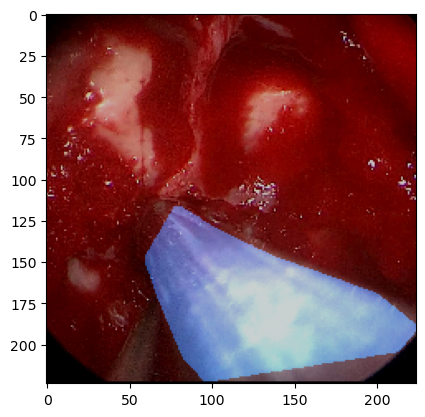

In [18]:
# check ignore lists
import os
from matplotlib import pyplot as plt
split = "train"
list = f"{split}_ignore.txt"
list_root = './data_224/lists'
image_dir = './data_224'


sample_list = open(os.path.join(list_root, list)).readlines()
for sample in sample_list:
    sample = sample.strip('\n')
    arr_source = load_array_from_png(os.path.join(image_dir, split, "imgs", sample), mode='image')
    arr_mask = load_array_from_png(os.path.join(image_dir, split, "labels", sample), mode='mask')
    if arr_source is None or arr_mask is None:
        raise Exception("Error when loading the images")
    img = blend_with_filled_mask(image=arr_source,
                                     required_classes=[1,2,3,4,5,6], num_class=7,
                                     mask=arr_mask, img_weight=0.96, mask_weight=0.7)
    plt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt_img = Image.fromarray(plt_img.astype(np.uint8))
    plt.imshow(plt_img)